In [ ]:
import numpy as np
from env.propagators.hierarchicalPropagator import H2CWDePropagator
from agent.agent import H2Agent
from trainer.trainer import H2TreeTrainer
p = H2CWDePropagator(3, device="cuda")
h1out_ub = [ 1000]*3 + [ 3.6]*3
h1out_lb = [-1000]*3 + [-3.6]*3
h2out_ub = [ 0.06]*3
h2out_lb = [-0.06]*3
agent = H2Agent(obs_dim=p.obs_dim,
                h1obs_dim=p.obs_dim,
                h2obs_dim=6, 
                h1out_dim=p.h1_action_dim, 
                h2out_dim=p.h2_action_dim, 
                h1a_hiddens=[512]*8, 
                h2a_hiddens=[512]*8, 
                h1c_hiddens=[512]*8,
                h1out_ub=h1out_ub, 
                h1out_lb=h1out_lb, 
                h2out_ub=h2out_ub, 
                h2out_lb=h2out_lb, 
                device="cuda")
T = H2TreeTrainer(p, agent,)

In [ ]:
loss = T.h2Pretrain(5, 100, states_num=256)

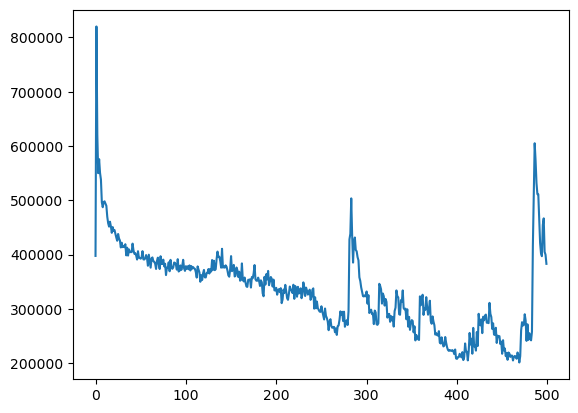

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# loss = loss_list["h2"]
# loss = -np.array(loss)
fig, ax = plt.subplots(1, 1, sharex=True,)
# ax.set_yscale("log")
ax.plot(loss)

In [ ]:
T.agent.save("../model/h2_.ptd")

In [ ]:
T.agent.load("../model/h2_.ptd")

In [ ]:
_, l, v = T.treeSim(10, 64)
print(np.mean(l))
print(v)

2172.3460693359375
-138.39578


In [ ]:
_, l, v = T.treeSim(10, 64)
print(np.mean(l))
print(v)

733.341162109375
-179.9083


In [ ]:
from trainer.mpTrainer_ import mpH2TreeTrainer
import data.buffer
h1out_ub = [ 1000]*3 + [ 3.6]*3
h1out_lb = [-1000]*3 + [-3.6]*3
h2out_ub = [ 0.06]*3
h2out_lb = [-0.06]*3
agentArgs = {"h1a_hiddens": [1024]*6, 
             "h2a_hiddens": [512]*8, 
             "h1c_hiddens": [1024]*6,
             "h1out_ub": h1out_ub, 
             "h1out_lb": h1out_lb, 
             "h2out_ub": h2out_ub, 
             "h2out_lb": h2out_lb, }
buffer_keys = ["states", "obss", "actions", "rewards", "next_states", "next_obss",
               "dones", "Q_targets", "V_targets", "regret_mc", "terminal_rewards"]
buffer = data.buffer.replayBuffer(buffer_keys, capacity=10000, batch_size=640)
mt = mpH2TreeTrainer(n_process=16, buffer=buffer, n_debris=3, agentArgs=agentArgs, 
                 select_itr=1, select_size=1, batch_size=1024, main_device="cuda", mode="alter")
# mt.main_agent.load("../model/check_point.ptd")

In [ ]:
h1td, _ = mt.main_trainer.tutorSim(None)

In [ ]:
h1td, _ = mt.main_trainer.h1Sim(None)

In [ ]:
loss = mt.main_trainer.h2Pretrain(5, 100, states_num=256)

Output()

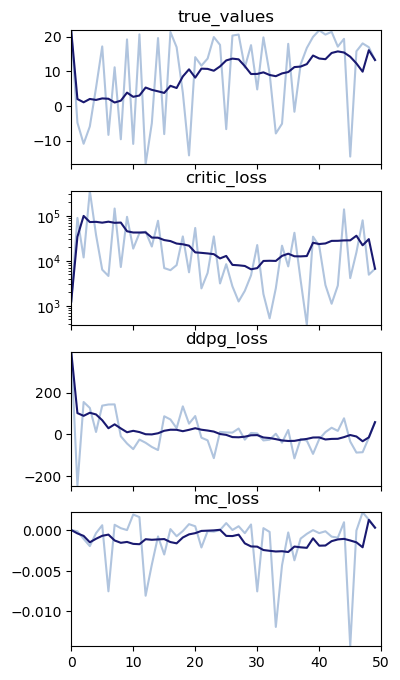

In [ ]:
mt.train(50, 50,)

In [ ]:
from trainer.mpTrainer_ import mpH2TreeTrainer
import matplotlib.pyplot as plt
import data.buffer
action_bounds = [1000, 1000, 1000, 3.6, 3.6, 3.6]
sigma_bounds=  [1e2]*6
agentArgs = {"actor_hiddens": [512]*6, 
             "critic_hiddens": [512]*6,
             "action_bounds": action_bounds,
             "sigma_upper_bounds": sigma_bounds }
buffer_keys = ["states", "obss", "actions", "rewards", "next_states", "next_obss",
               "dones", "Q_targets", "V_targets", "regret_mc", "terminal_rewards"]
buffer = data.buffer.replayBuffer(buffer_keys, capacity=10000, batch_size=640)
mt = mpH2TreeTrainer(n_process=16, buffer=buffer, n_debris=3, agentArgs=agentArgs, 
                 select_itr=1, select_size=1, batch_size=1024, main_device="cuda", mode="SAC")
# mt.main_agent.load("../model/check_point.ptd")

In [ ]:
t = mt.main_trainer
buffer_keys = ["states", "obss", "actions", "rewards", "next_states", "next_obss", "dones"]
buffer = data.buffer.replayBuffer(buffer_keys, capacity=10000, batch_size=640)
t.buffer = buffer
t.loss_keys = ["critic_loss", "actor_loss", "alpha_loss"]
datas = t.offPolicyTrain(10, 100, states_num=20)

In [ ]:
import numpy as np
from plotting import analyze
import matplotlib.pyplot as plt
import torch
s = mt.main_trainer.prop.randomInitStates(1)
o = mt.main_trainer.prop.getObss(s)
o = o.detach().cpu().numpy()
o_a = np.hstack((o.flatten(), np.zeros(mt.main_agent.action_dim)))

n_f = mt.main_agent.critic.n_feature
axis = np.array([0,2])
axis.sort()
dims = n_f-(mt.main_agent.action_dim-axis)
o_a_ = np.delete(o_a, dims)

plt.close("all")
analyze.criticContour(mt.main_agent, span=(-5000,5000), dims=dims, step=101, singles=o_a_) # contour plot of critic in selected dims

Output()

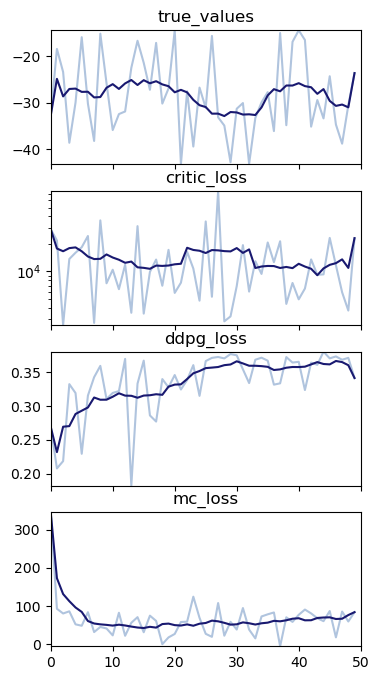

In [ ]:
mt.train(20, 50,)

In [ ]:
td, v = mt.main_trainer.h1Sim(None)

In [ ]:
td["states"][:,:,:3]

In [ ]:
mt.debug()

In [1]:
import numpy as np
from env.propagators.hierarchicalPropagator import H2CWDePropagator
from agent.agent import H2Agent
from trainer.trainer import H2TreeTrainer
prop = H2CWDePropagator(3, device="cuda", h1_step=10, h2_step=360)
h1out_ub = [ 1000]*3 + [ 3.6]*3
h1out_lb = [-1000]*3 + [-3.6]*3
h2out_ub = [ 0.06]*3
h2out_lb = [-0.06]*3
agent = H2Agent(obs_dim=prop.obs_dim,
                h1obs_dim=prop.obs_dim,
                h2obs_dim=6, 
                h1out_dim=prop.h1_action_dim, 
                h2out_dim=prop.h2_action_dim, 
                h1a_hiddens=[512]*8, 
                h2a_hiddens=[512]*8, 
                h1c_hiddens=[512]*8,
                h1out_ub=h1out_ub, 
                h1out_lb=h1out_lb, 
                h2out_ub=h2out_ub, 
                h2out_lb=h2out_lb, 
                device="cuda")
T = H2TreeTrainer(prop, agent,)

In [ ]:
T.h2Pretrain(100)

In [ ]:
T.h1Sim(states_num=128, train_h2a=True)

In [6]:
state0 = prop.randomInitStates(1)
td, state, _, h1action, _, _, _  = T.h2Sim(state0, prop_with_grad=False)

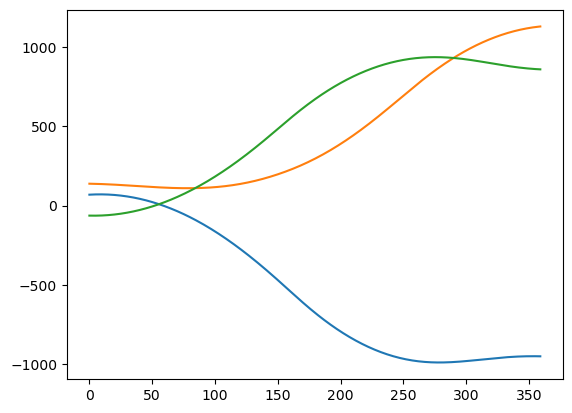

In [8]:
import matplotlib.pyplot as plt
plt.plot(td["states"][:,0,:3].detach().cpu().numpy())
plt.show()

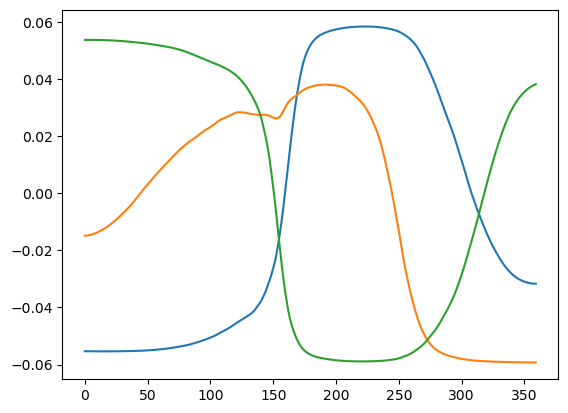

In [9]:
plt.plot(td["actions"][:,0,:3].detach().cpu().numpy())
plt.show()

In [5]:
T.agent.save("../model/h2.ptd")

In [3]:
T.agent.load("../model/h2.ptd")